In [1]:
# Written by Rahi Misra
# This file is used to gain more understanding of the data after feature engineering
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the merged_data_combined.csv file
df = pd.read_csv("FeaturesReworked.csv")

df.dtypes

C:\Users\user\AppData\Local\Temp\ipykernel_9396\1026228010.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("FeaturesReworked.csv")


draw_size          int64
tourney_name      object
surface           object
tourney_level     object
tourney_date      object
best_of            int64
round             object
player1           object
player1_age        int64
player1_height     int64
player1_hand      object
player1_ioc       object
player1_rank       int64
player1_seed       int64
player1_entry     object
player2           object
player2_age        int64
player2_height     int64
player2_hand      object
player2_ioc       object
player2_rank       int64
player2_seed       int64
player2_entry     object
winner             int64
dtype: object

In [8]:
numeric_features = [
    'draw_size',
    'best_of',
    'player1_age',
    'player1_height',
    'player1_rank',
    'player1_seed',
    'player2_age',
    'player2_height',
    'player2_rank',
    'player2_seed',
    'winner'
]

categorical_features = [
    'tourney_name',
    'surface',
    'tourney_level',
    'tourney_date',
    'round',
    'player1',
    'player1_hand',
    'player1_ioc',
    'player1_entry',
    'player2',
    'player2_hand',
    'player2_ioc',
    'player2_entry'
]

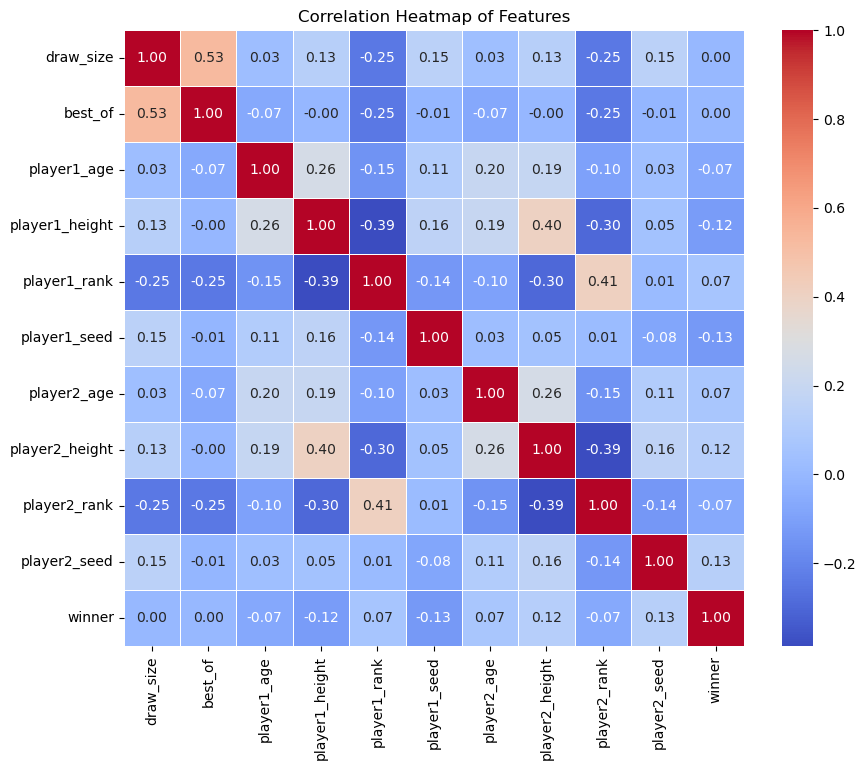

In [3]:
# Calculate the correlation matrix
correlation_matrix = df[numeric_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [4]:
# Create new features representing differentials
df['age_diff'] = df['player1_age'] - df['player2_age']
df['height_diff'] = df['player1_height'] - df['player2_height']
df['rank_diff'] = df['player1_rank'] - df['player2_rank']
df['seed_diff'] = df['player1_seed'] - df['player2_seed']

print(df.head())

   draw_size tourney_name surface tourney_level tourney_date  best_of round  \
0         32       Dublin   Grass             A   1968-07-08        3   R32   
1         32       Dublin   Grass             A   1968-07-08        3   R32   
2         32       Dublin   Grass             A   1968-07-08        3   R32   
3         32       Dublin   Grass             A   1968-07-08        3   R32   
4         32       Dublin   Grass             A   1968-07-08        3   R32   

           player1  player1_age  player1_height  ... player2_hand player2_ioc  \
0       Doug Smith            0               0  ...            U         IRL   
1  Maurice Pollock            0               0  ...            R         RSA   
2     Cecil Pedlow            0               0  ...            U         IRL   
3  Unknown Fearmon            0               0  ...            R         NED   
4  Armistead Neely           21               0  ...            U         IRL   

   player2_rank  player2_seed player2_

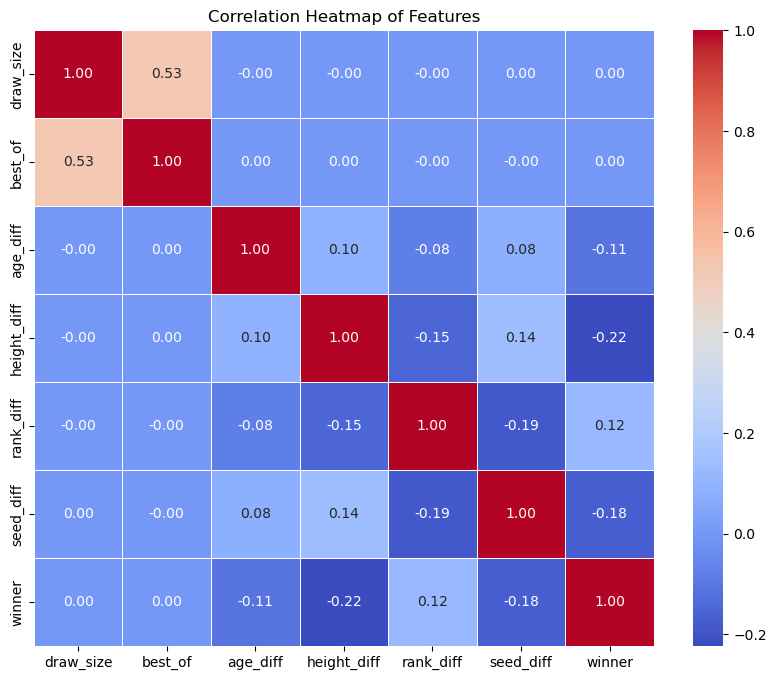

In [6]:
# Check correlations of numeric features with differentials to see if there is more information
newmeric_features = [
    'draw_size',
    'best_of',
    'age_diff',
    'height_diff',
    'rank_diff',
    'seed_diff',
    'winner'
]
# Calculate the correlation matrix
correlation_matrix = df[newmeric_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [9]:
from scipy.stats import chi2_contingency
#chi-squared test to find correlation between categorical features

target_variable = 'winner'

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df[target_variable])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Output results
    print(f"\nChi-squared test for {feature} vs {target_variable}:")
    print(f"Chi2 value: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of Freedom: {dof}")

    # Check for dependence or independence
    alpha = 0.05
    if p < alpha:
        print("The two categorical variables are dependent (reject the null hypothesis).")
    else:
        print("The two categorical variables are independent (fail to reject the null hypothesis).")



Chi-squared test for tourney_name vs winner:
Chi2 value: 240.29992603656942
P-value: 1.0
Degrees of Freedom: 8815
The two categorical variables are independent (fail to reject the null hypothesis).

Chi-squared test for surface vs winner:
Chi2 value: 0.01899341388174913
P-value: 0.9993077705409136
Degrees of Freedom: 3
The two categorical variables are independent (fail to reject the null hypothesis).

Chi-squared test for tourney_level vs winner:
Chi2 value: 0.028840855826470675
P-value: 0.9999999999948656
Degrees of Freedom: 10
The two categorical variables are independent (fail to reject the null hypothesis).

Chi-squared test for tourney_date vs winner:
Chi2 value: 96.62335324251532
P-value: 1.0
Degrees of Freedom: 5418
The two categorical variables are independent (fail to reject the null hypothesis).

Chi-squared test for round vs winner:
Chi2 value: 11.79758452106048
P-value: 0.6942812508998593
Degrees of Freedom: 15
The two categorical variables are independent (fail to reject

In [11]:
# Calculate the statistical summary
for column in numeric_features:
  Summary = df[column].describe()

  Count = Summary['count']
  Mean = Summary['mean']
  STD = Summary['std']
  Min = Summary['min']
  Max = Summary['max']
  Q1 = Summary['25%']
  Q2 = Summary['50%']
  Q3 = Summary['75%']

  # Calculate the IQR
  IQR = Q3 - Q1

  # Calculate the range
  Range = Max - Min

  # Calculate the Variance
  Variance = STD**2

  # Extract the mode values
  Mode = df[column].mode()
  Modes = Mode.tolist()

  # Calculate the skew
  Skew = df[column].skew()

  # Print each statistic on a new line
  print(f"\nColumn: {column}")
  print(f"Count: {Count: .3f}")
  print(f"Mean: {Mean: .3f}")
  print(f"Mode: {Modes}")
  print(f"Standard Deviation: {STD: .3f}")
  print(f"Variance: {Variance: .3f}")
  print(f"Min: {Min: .3f}")
  print(f"Max: {Max: .3f}")
  print(f"25th Percentile (Q1): {Q1: .3f}")
  print(f"50th Percentile (Median, Q2): {Q2: .3f}")
  print(f"75th Percentile (Q3): {Q3: .3f}")
  print(f"IQR: {IQR: .3f}")
  print(f"Range: {Range: .3f}")
  print(f"Skew: {Skew: .3f}")


Column: draw_size
Count:  899360.000
Mean:  39.751
Mode: [32]
Standard Deviation:  24.916
Variance:  620.795
Min:  0.000
Max:  128.000
25th Percentile (Q1):  32.000
50th Percentile (Median, Q2):  32.000
75th Percentile (Q3):  32.000
IQR:  0.000
Range:  128.000
Skew:  2.704

Column: best_of
Count:  899360.000
Mean:  3.150
Mode: [3]
Standard Deviation:  0.527
Variance:  0.277
Min:  1.000
Max:  5.000
25th Percentile (Q1):  3.000
50th Percentile (Median, Q2):  3.000
75th Percentile (Q3):  3.000
IQR:  0.000
Range:  4.000
Skew:  3.224

Column: player1_age
Count:  899360.000
Mean:  22.862
Mode: [22]
Standard Deviation:  5.351
Variance:  28.637
Min:  0.000
Max:  100.000
25th Percentile (Q1):  20.000
50th Percentile (Median, Q2):  23.000
75th Percentile (Q3):  26.000
IQR:  6.000
Range:  100.000
Skew: -1.220

Column: player1_height
Count:  899360.000
Mean:  101.007
Mode: [0]
Standard Deviation:  91.774
Variance:  8422.425
Min:  0.000
Max:  211.000
25th Percentile (Q1):  0.000
50th Percentile (M

In [13]:
# Class distributions
for column in categorical_features:
    
    class_distribution = df[column].value_counts(normalize=True)

    print(f"\nClass Distribution for {column}:")
    print(class_distribution)



Class Distribution for tourney_name:
tourney_name
Wimbledon                       0.018679
US Open                         0.018475
Roland Garros                   0.014613
Australian Open                 0.011254
M15 Monastir                    0.005654
                                  ...   
Davis Cup AME SF: ARG vs CHI    0.000002
Davis Cup G1 SF: PER vs USA     0.000002
Davis Cup WG QF: NZL vs GBR     0.000002
Quebec City                     0.000001
Cannes Chps                     0.000001
Name: proportion, Length: 8816, dtype: float64

Class Distribution for surface:
surface
Clay      0.471889
Hard      0.414810
Grass     0.058708
Carpet    0.054593
Name: proportion, dtype: float64

Class Distribution for tourney_level:
tourney_level
S     0.477874
C     0.200372
A     0.156526
G     0.064221
M     0.029906
15    0.022533
D     0.021355
25    0.013902
15    0.008604
25    0.004096
F     0.000610
Name: proportion, dtype: float64

Class Distribution for tourney_date:
tourney_date

In [14]:
# Correlation Coefficient
from pandas import set_option
set_option('display.precision', 3)

correlation_matrix = df[numeric_features].corr()

print(correlation_matrix)

                draw_size    best_of  player1_age  player1_height  \
draw_size       1.000e+00  5.272e-01        0.030           0.128   
best_of         5.272e-01  1.000e+00       -0.067          -0.005   
player1_age     2.978e-02 -6.693e-02        1.000           0.259   
player1_height  1.282e-01 -4.803e-03        0.259           1.000   
player1_rank   -2.460e-01 -2.462e-01       -0.152          -0.387   
player1_seed    1.481e-01 -1.115e-02        0.109           0.158   
player2_age     3.028e-02 -6.778e-02        0.196           0.194   
player2_height  1.295e-01 -4.945e-03        0.192           0.404   
player2_rank   -2.459e-01 -2.461e-01       -0.099          -0.297   
player2_seed    1.468e-01 -1.113e-02        0.032           0.047   
winner          1.589e-05  3.125e-04       -0.071          -0.122   

                player1_rank  player1_seed  player2_age  player2_height  \
draw_size             -0.246         0.148        0.030           0.129   
best_of              

array([[<Axes: title={'center': 'draw_size'}>,
        <Axes: title={'center': 'best_of'}>,
        <Axes: title={'center': 'player1_age'}>],
       [<Axes: title={'center': 'player1_height'}>,
        <Axes: title={'center': 'player1_rank'}>,
        <Axes: title={'center': 'player1_seed'}>],
       [<Axes: title={'center': 'player2_age'}>,
        <Axes: title={'center': 'player2_height'}>,
        <Axes: title={'center': 'player2_rank'}>],
       [<Axes: title={'center': 'player2_seed'}>,
        <Axes: title={'center': 'winner'}>, <Axes: >]], dtype=object)

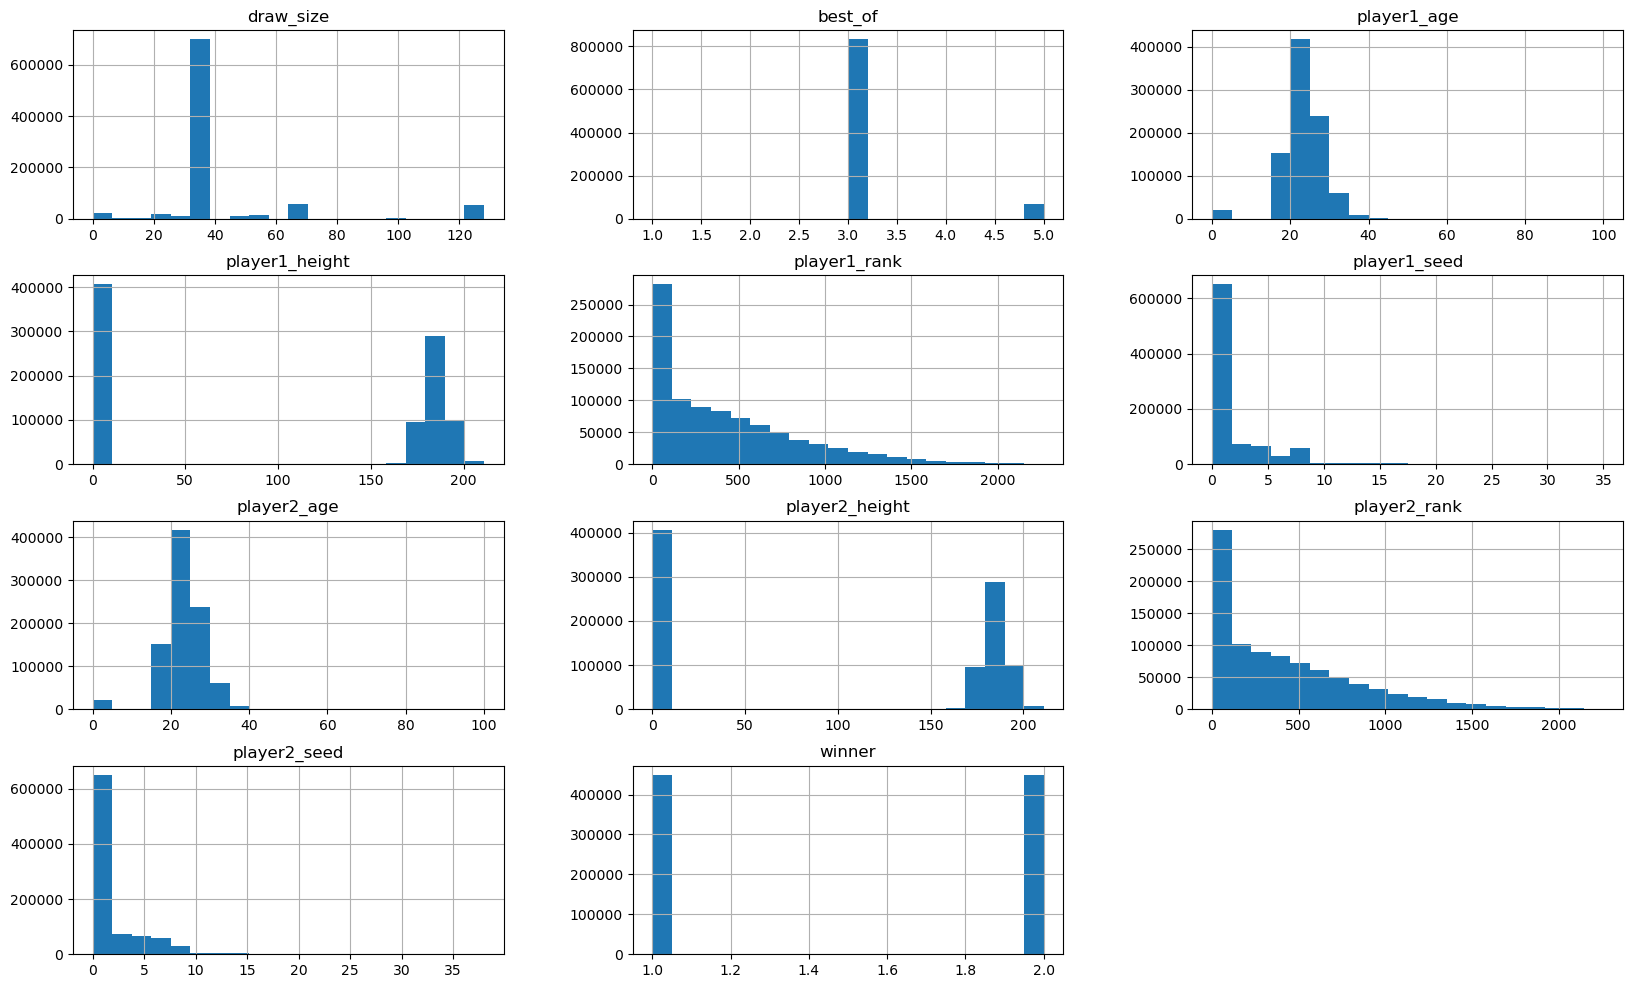

In [15]:
# Histogram
df[numeric_features].hist(bins=20, figsize=(20, 12))

draw_size             Axes(0.125,0.77;0.352273x0.11)
best_of            Axes(0.547727,0.77;0.352273x0.11)
player1_age          Axes(0.125,0.638;0.352273x0.11)
player1_height    Axes(0.547727,0.638;0.352273x0.11)
player1_rank         Axes(0.125,0.506;0.352273x0.11)
player1_seed      Axes(0.547727,0.506;0.352273x0.11)
player2_age          Axes(0.125,0.374;0.352273x0.11)
player2_height    Axes(0.547727,0.374;0.352273x0.11)
player2_rank         Axes(0.125,0.242;0.352273x0.11)
player2_seed      Axes(0.547727,0.242;0.352273x0.11)
winner                Axes(0.125,0.11;0.352273x0.11)
dtype: object

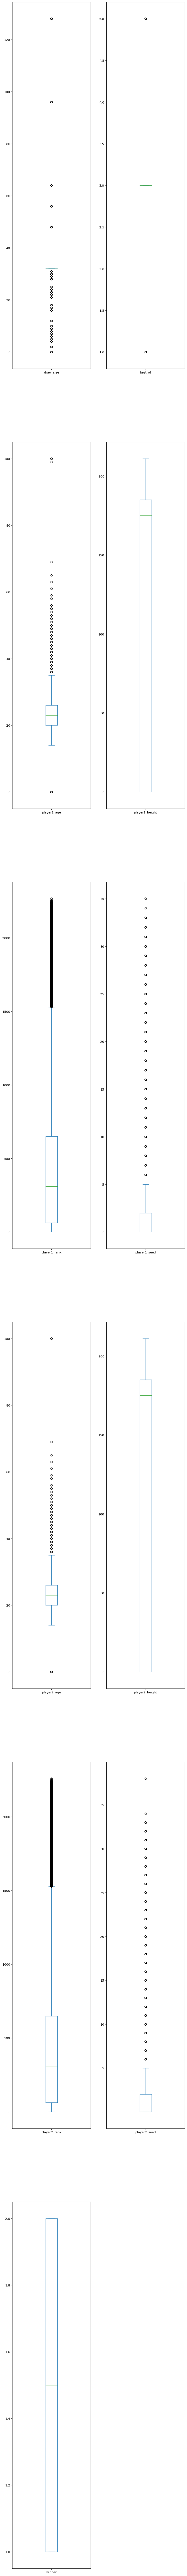

In [16]:
# Boxplot
df[numeric_features].plot(kind='box', subplots=True, layout=(6, 2), figsize=(10, 150), sharex=False, sharey=False)

array([[<Axes: xlabel='draw_size', ylabel='draw_size'>,
        <Axes: xlabel='best_of', ylabel='draw_size'>,
        <Axes: xlabel='player1_age', ylabel='draw_size'>,
        <Axes: xlabel='player1_height', ylabel='draw_size'>,
        <Axes: xlabel='player1_rank', ylabel='draw_size'>,
        <Axes: xlabel='player1_seed', ylabel='draw_size'>,
        <Axes: xlabel='player2_age', ylabel='draw_size'>,
        <Axes: xlabel='player2_height', ylabel='draw_size'>,
        <Axes: xlabel='player2_rank', ylabel='draw_size'>,
        <Axes: xlabel='player2_seed', ylabel='draw_size'>,
        <Axes: xlabel='winner', ylabel='draw_size'>],
       [<Axes: xlabel='draw_size', ylabel='best_of'>,
        <Axes: xlabel='best_of', ylabel='best_of'>,
        <Axes: xlabel='player1_age', ylabel='best_of'>,
        <Axes: xlabel='player1_height', ylabel='best_of'>,
        <Axes: xlabel='player1_rank', ylabel='best_of'>,
        <Axes: xlabel='player1_seed', ylabel='best_of'>,
        <Axes: xlabel='play

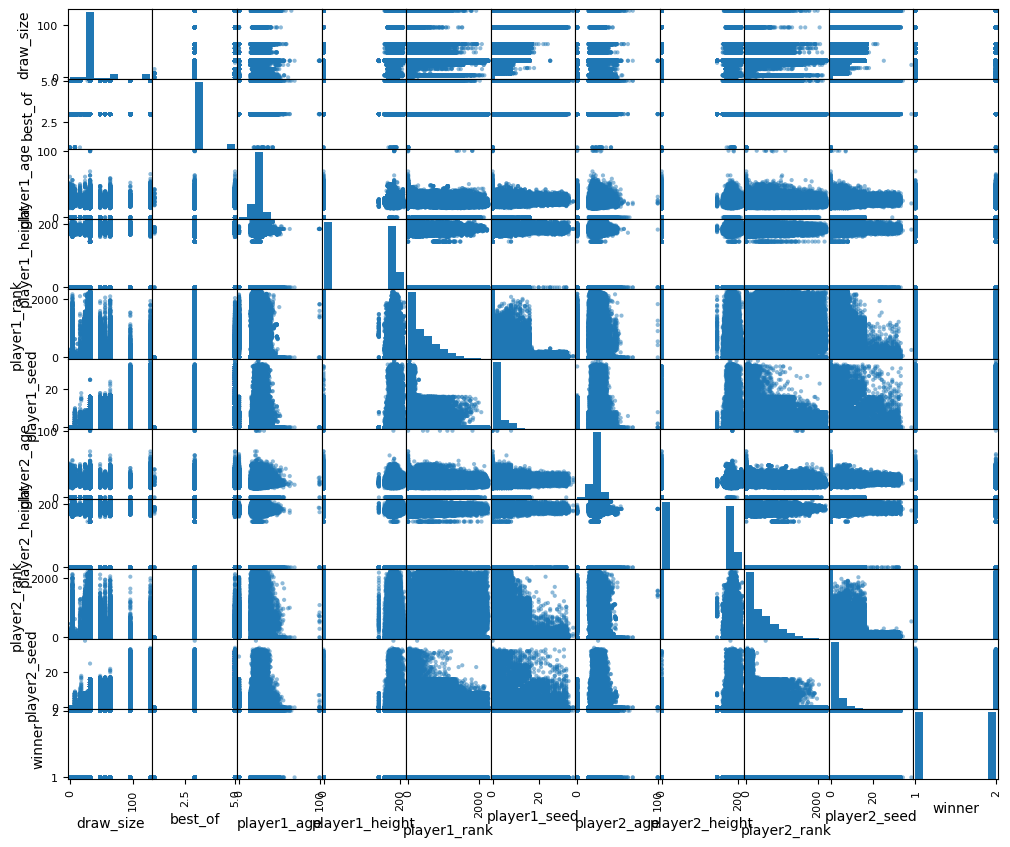

In [17]:
# Create a scatter matrix
from pandas.plotting import scatter_matrix

scatter_matrix(df[numeric_features], figsize=(12, 10), diagonal='hist', alpha=0.5)